# Importing libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread

# Importing Dataset

In [14]:
dataset = pd.read_csv('english.csv')
print(dataset)

                   image label
0     Img/img001-001.png     0
1     Img/img001-002.png     0
2     Img/img001-003.png     0
3     Img/img001-004.png     0
4     Img/img001-005.png     0
...                  ...   ...
3405  Img/img062-051.png     z
3406  Img/img062-052.png     z
3407  Img/img062-053.png     z
3408  Img/img062-054.png     z
3409  Img/img062-055.png     z

[3410 rows x 2 columns]


# Importing images from dataset
## resizing image to 18x24 pixels

In [15]:
from skimage.transform import resize
x,y = [],[]
for i in range(0,550):
    img = imread(dataset.iloc[i,0])
    img = resize(img,(18,24))
    x.append(img)
    y.append(dataset.iloc[i,1])

## Converting x,y to numpy arrays

In [16]:
x = np.array(x)
y = np.array(y)

## Splitting data into train and test sets

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## visualising first 4 images from training set

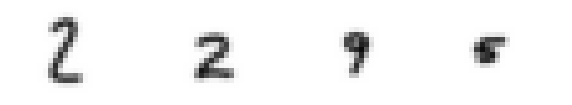

In [19]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

## reshaping the arrays to train (flatining images)

In [20]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))

# Training and testing our model

In [21]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.04,C=7)
classifier.fit(x_train,y_train)

SVC(C=7, gamma=0.04)

In [22]:
y_pred = classifier.predict(x_test)

## Checking accuracy and confusion matrix for our model 

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred,labels=classifier.classes_)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 7  0  0  0  0  0  1  0  0  0]
 [ 0 12  1  0  0  0  0  0  0  0]
 [ 1  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  1  0  1]
 [ 0  0  1  0  7  1  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  2]
 [ 0  0  0  0  4  2  3  0  0  0]
 [ 0  2  0  0  0  0  0  9  0  1]
 [ 0  0  1  1  0  0  0  0 13  0]
 [ 0  1  0  1  3  1  0  1  1  6]]
0.7363636363636363


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.80      0.92      0.86        13
           2       0.73      0.89      0.80         9
           3       0.82      0.82      0.82        11
           4       0.50      0.70      0.58        10
           5       0.64      0.78      0.70         9
           6       0.75      0.33      0.46         9
           7       0.82      0.75      0.78        12
           8       0.93      0.87      0.90        15
           9       0.55      0.43      0.48        14

    accuracy                           0.74       110
   macro avg       0.74      0.74      0.73       110
weighted avg       0.74      0.74      0.73       110

